| Project name   |  Sensor de colores |
|:----------|:-------------|
| **Autor(S)**| T034456, Marco Antonio Ramos Tadeo <br>T030014, Derek Ivan Lopez Anaya|
| **Editor**|Dr. Adán Hirales Carbajal|
| **Last update** |11/30/2023  |

### <span style="color:blue">Planteamiento del problema</span>

El daltonismo, es una condición visual que afecta la capacidad de una persona para percibir ciertos colores. En el ámbito laboral, el daltonismo puede convertirse en un desafío significativo, ya que muchas tareas cotidianas y profesionales dependen de la correcta identificación y diferenciación de colores.

Las personas con daltonismo se enfrentan a diversos obstáculos en sus entornos laborales. Desde la identificación de señales de seguridad hasta la interpretación de gráficos y datos, la capacidad de distinguir entre colores es esencial en numerosas ocupaciones. En industrias como la electrónica, diseño gráfico, moda y seguridad, la habilidad para reconocer matices de color puede ser crítica. La limitación de los afectados por el daltonismo no solo afecta su eficiencia en el trabajo, sino que también puede generar frustración y disminuir la autoestima.

Conscientes de los desafíos que enfrentan las personas con daltonismo, proponemos una solución utilizando el sensor EZO-RGB. Este dispositivo avanzado tiene la capacidad de detectar y diferenciar una amplia gama de colores, permitiendo a las personas con daltonismo identificar con precisión y rapidez los tonos que se encuentran frente al sensor.

El sensor EZO-RGB utiliza tecnología de última generación para analizar la luz reflejada y proporcionar información detallada sobre la composición de colores en tiempo real.

La principal función del sensor radica en su capacidad para detectar el color de un objeto, expresándolo en el formato RGB. Este formato se caracteriza por representar cada color mediante valores numéricos, siendo estos valores limitados entre 0 y 255. En el modelo RGB, la información se organiza en tres secuencias de números, cada una con un rango de 0 a 255. La combinación específica de estos valores en las tres secuencias define un color único. Nuestro reto consiste en descifrar y reconocer el color correspondiente a través de los resultados obtenidos en el formato RGB.

### <span style="color:blue">Componentes del Hardware</span>

|Componente|Cantidad|Características|
|:---|:---|:-----|
|EZO-RGB|1| Embedded color sensor|
| Arduino UNO R3 |1| Microcontrolador |
|Computadora| 1| En la cual vemos los resultados


### <span style="color:blue">Esquema del hardware</span>

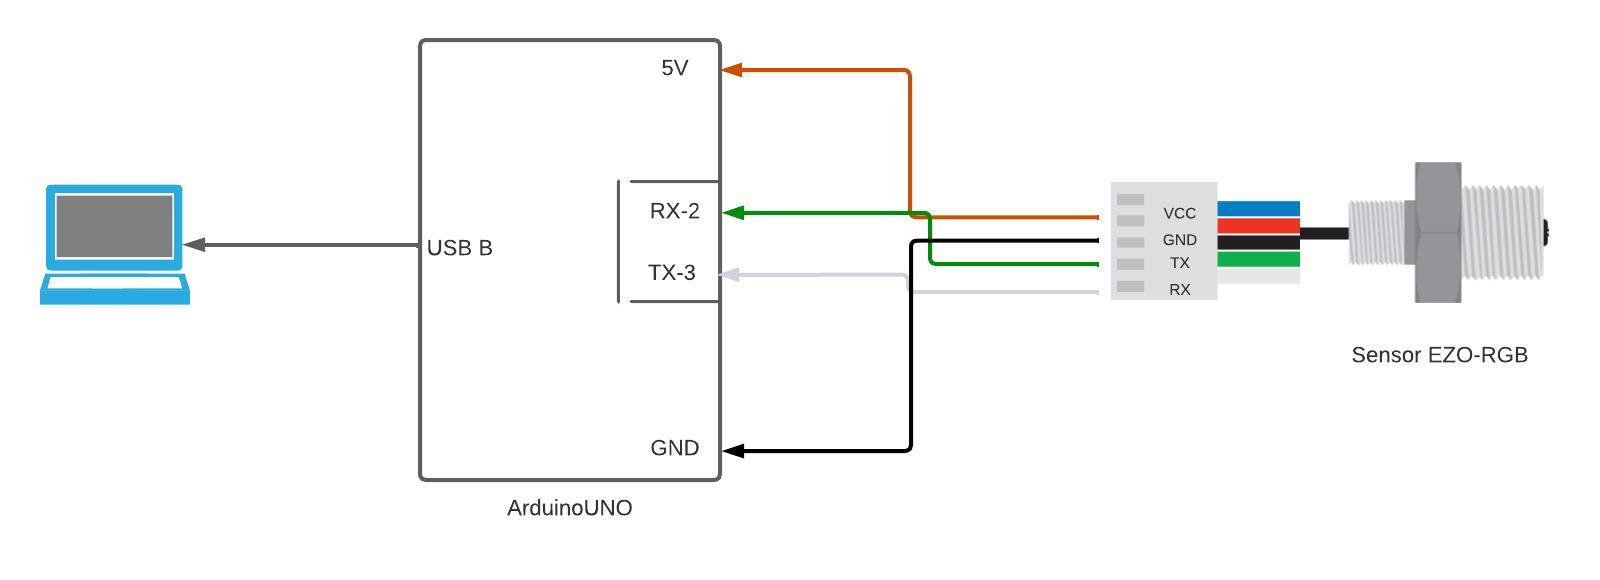

### <span style="color:blue">Parámetros en ArudinoIDE</span>

RX (3) - Se conecta el RX con el puerto número 3 del Arduino (TX)

TX (2) - Se conecta el TX con el puerto número 2 del Arduino (RX)

GND - Este lo podemos identificar por su color negro, se conecta directamente a tierra.

VCC (5V) - Este lo podemos identificar por su color rojo, hace referencia a la alimentación positiva.  

Comunicación:

* Data bit: 8-bit
* Baud rate: 9600 bits/s
* Parity: None
* Step bit: 1 stop bit
* Requisitos de entrada: 12 caracteres.

### <span style="color:blue">Configuración del sensor EZO-RGB con Arduino UNO </span>

```
#include <SoftwareSerial.h>

#define rx 2
#define tx 3

SoftwareSerial myserial(rx, tx);

String inputstring = "";
String sensorstring = "";
boolean input_string_complete = false;
boolean sensor_string_complete = false;

void setup() {
  Serial.begin(9600);
  myserial.begin(9600);
  inputstring.reserve(10);
  sensorstring.reserve(30);
}

void serialEvent() {
  inputstring = Serial.readStringUntil(13);
  input_string_complete = true;
}

void print_color_name(int red, int green, int blue) {
  // Comparación de valores RGB para determinar el color
  if (red < 20 && green < 20 && blue < 20) {
    Serial.println("Color: Negro");
  } else if (red > 100 && green < 35 && blue < 35) {
    Serial.println("Color: Rojo");
  } else if (red > 120 && green < 45 && blue < 35) {
    Serial.println("Color: Naranja");
  } else if (red > 300 && green > 300 && blue < 150) {
    Serial.println("Color: Amarillo");
  } else if (red > 80 && green > 130 && blue < 85) {
    Serial.println("Color: Verde");
  } else if (red < 35 && green > 40 && blue > 80) {
    Serial.println("Color: Azul");
  } else if (red > 135 && green < 65 && blue > 50) {
    Serial.println("Color: Púrpura");
  }else if (red > 60 && green > 40 && blue < 65){
    Serial.println("Color: Cafe");
  }else if (red > 150 && green > 150 && blue > 150) {
    Serial.println("Color: Blanco");
  } else if (red < 100 && green < 100 && blue < 200) {
    Serial.println("Color: Gris");
  } else {
    Serial.println("Color: Desconocido");
  }
}

void loop() {
  if (input_string_complete == true) {
    myserial.print(inputstring);
    myserial.print('\r');
    inputstring = "";
    input_string_complete = false;
  }

  if (myserial.available() > 0) {
    char inchar = (char)myserial.read();
    sensorstring += inchar;
    if (inchar == '\r') {
      sensor_string_complete = true;
    }
  }

  if (sensor_string_complete == true) {
    if (isdigit(sensorstring[0]) == false) {
      Serial.println(sensorstring);
    } else {
      print_RGB_data();  // Aquí deberías llamar a la función print_color_name en lugar de print_RGB_data
    }
    sensorstring = "";
    sensor_string_complete = false;
  }
}

void print_RGB_data(void) {
  char sensorstring_array[30];
  char *red;
  char *grn;
  char *blu;
  int int_red;
  int int_grn;
  int int_blu;

  sensorstring.toCharArray(sensorstring_array, 30);
  red = strtok(sensorstring_array, ",");
  grn = strtok(NULL, ",");
  blu = strtok(NULL, ",");

  Serial.print("RED:");
  Serial.println(red);

  Serial.print("GREEN:");
  Serial.println(grn);

  Serial.print("BLUE:");
  Serial.println(blu);

  int_red = atoi(red);
  int_grn = atoi(grn);
  int_blu = atoi(blu);

  print_color_name(int_red, int_grn, int_blu);
}


```



##Resultados:

|Componente|Imágen|
|:---|:-----|
|Sensor encendido|img = mimg.imread('/content/Sensor.jpeg')|
|Sensor de atras| img = mimg.imread('/content/Sensor2.jpeg') |
|Arduino conectado| img = mimg.imread('/content/Sensor3.jpeg)|




##Referencias:

AtlasScientific. (2022). *Connecting A Color Sensor To An Arduino Uno*
  https://atlas-scientific.com/blog/color-sensor-arduino/

AtlasScientific. (2021). *EZO-RGB™ Embedded Color Sensor*
  https://files.atlas-scientific.com/EZO_RGB_Datasheet.pdf

  https://www.warburtech.co.uk/products/sensors/colour/atlas.scientific.ezo-rgb.embedded.colour.sensor/downloads/ENV-RGB.pdf

  https://sdindustrial.com.mx/blog/codigo-de-colores-resistencias/
  
  https://hetpro-store.com/TUTORIALES/i2c/

  https://sensorsandprobes.com/products/probes-ezo-rgb%E2%84%A2-embedded-color-sensor